# Classification Project

## Importring Libraries


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



## Importing Dataset

In [4]:
train_ds = pd.read_csv('./data/Adult_TrainDataset.csv')
test_ds = pd.read_csv('./data/Adult_TestDataset.csv')


In [5]:
train_ds.head()


,Age,Work_Class,Final_Weight,Education,Education-Number,Marital_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours-Per-Week,Native_Country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
test_ds.head()


,Age,Work_Class,Final_Weight,Education,Education-Number,Marital_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours-Per-Week,Native_Country,Income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


## Data Preprocessing

### Cleaning The Dataset

In [7]:
train_ds.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               32561 non-null  int64 
 1   Work_Class        32561 non-null  object
 2   Final_Weight      32561 non-null  int64 
 3   Education         32561 non-null  object
 4   Education-Number  32561 non-null  int64 
 5   Marital_Status    32561 non-null  object
 6   Occupation        32561 non-null  object
 7   Relationship      32561 non-null  object
 8   Race              32561 non-null  object
 9   Sex               32561 non-null  object
 10  Capital_Gain      32561 non-null  int64 
 11  Capital_Loss      32561 non-null  int64 
 12  Hours-Per-Week    32561 non-null  int64 
 13  Native_Country    32561 non-null  object
 14  Income            32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [8]:
train_ds.isnull().sum()


Age                 0
Work_Class          0
Final_Weight        0
Education           0
Education-Number    0
Marital_Status      0
Occupation          0
Relationship        0
Race                0
Sex                 0
Capital_Gain        0
Capital_Loss        0
Hours-Per-Week      0
Native_Country      0
Income              0
dtype: int64

In [9]:
test_ds.isnull().sum()


Age                 0
Work_Class          0
Final_Weight        0
Education           0
Education-Number    0
Marital_Status      0
Occupation          0
Relationship        0
Race                0
Sex                 0
Capital_Gain        0
Capital_Loss        0
Hours-Per-Week      0
Native_Country      0
Income              0
dtype: int64

The training dataset and test dataset is clean and there is no null value in it. So, we don't need to do any data cleaning. But, we need to do some data preprocessing to make the data suitable for the model.

### Visualizing The Dataset

In [10]:
train_ds['Income'].value_counts()


<=50K    24720
>50K      7841
Name: Income, dtype: int64

In [11]:
train_ds.describe()


,Age,Final_Weight,Education-Number,Capital_Gain,Capital_Loss,Hours-Per-Week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


#### Plotting the histogram of the numerical features for training dataset

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Final_Weight'}>],
       [<Axes: title={'center': 'Education-Number'}>,
        <Axes: title={'center': 'Capital_Gain'}>],
       [<Axes: title={'center': 'Capital_Loss'}>,
        <Axes: title={'center': 'Hours-Per-Week'}>]], dtype=object)

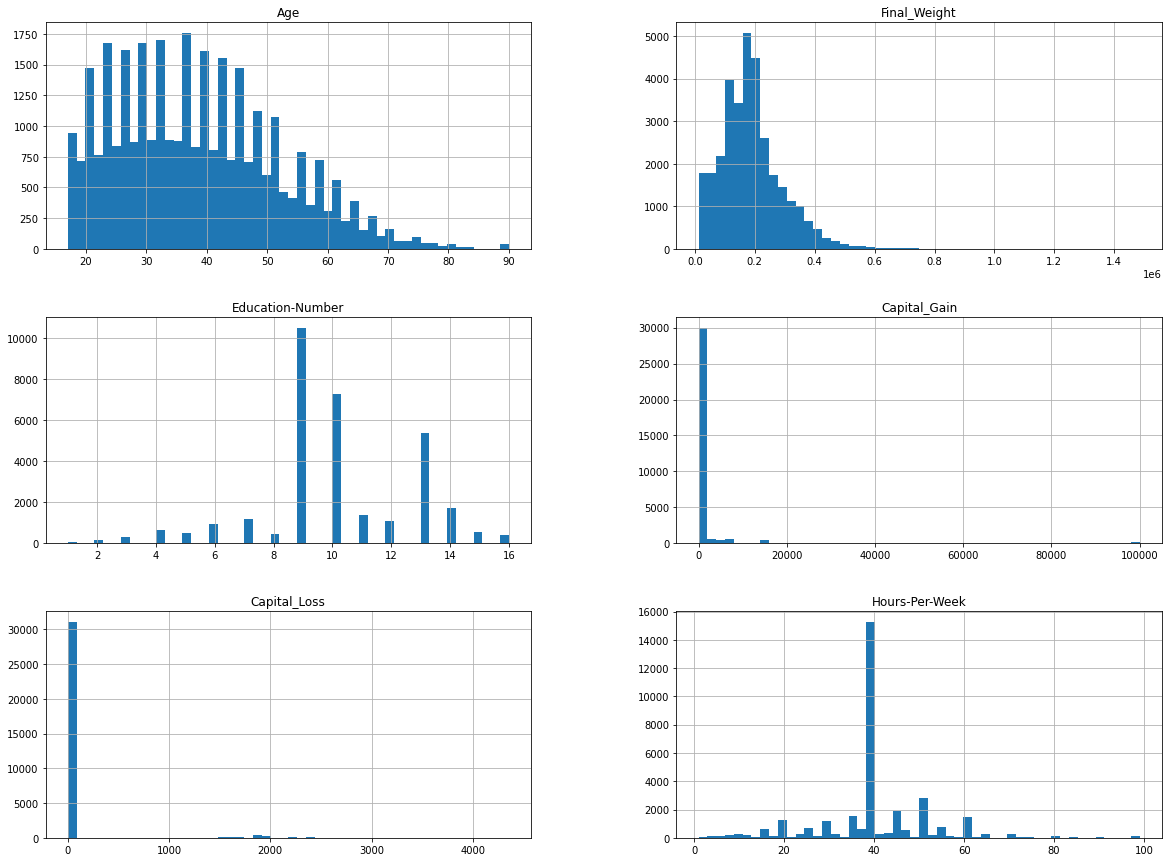

In [12]:
train_ds.hist(bins=50, figsize=(20, 15))

#### Plotting the histogram of the categorical features for training dataset

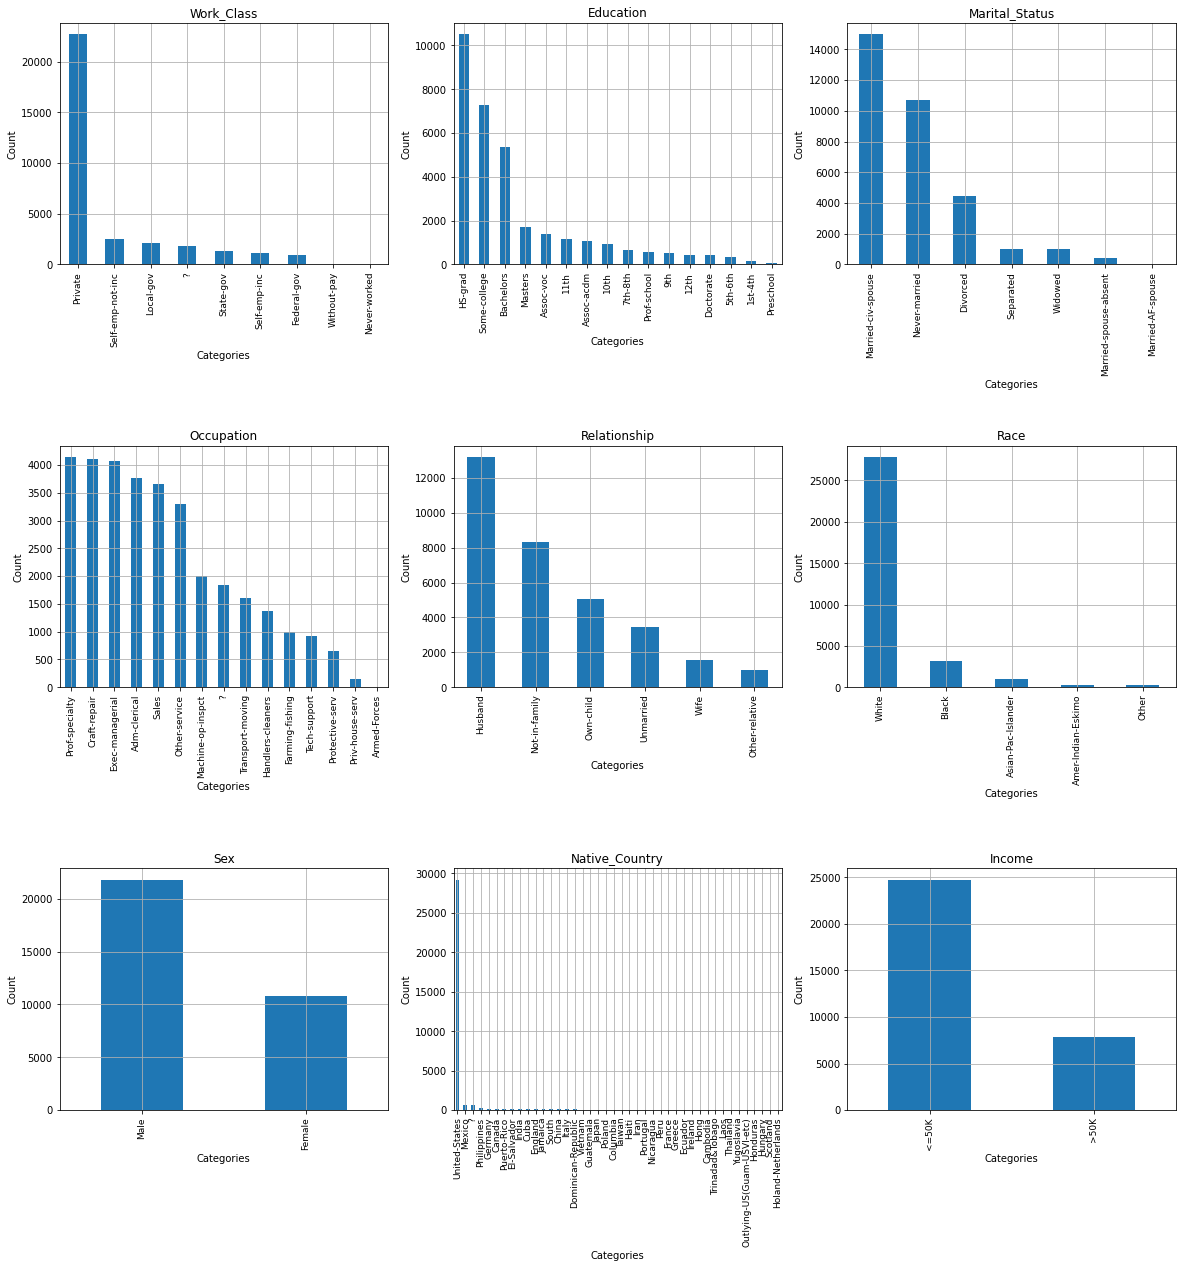

In [13]:
categorical_features = train_ds.select_dtypes(include=['object']).columns

fig = plt.figure(figsize=(20, 20))
plt.subplots_adjust(hspace=0.75)
for i, col in enumerate(categorical_features):
    plt.subplot(3, 3, i+1)

    train_ds[col].value_counts().plot(kind='bar')
    plt.grid(True)
    plt.title(col)
    plt.xlabel('Categories')
    plt.ylabel('Count')
    plt.xticks(fontsize=9)


#### Plotting the pie chart of the categorical features for training dataset

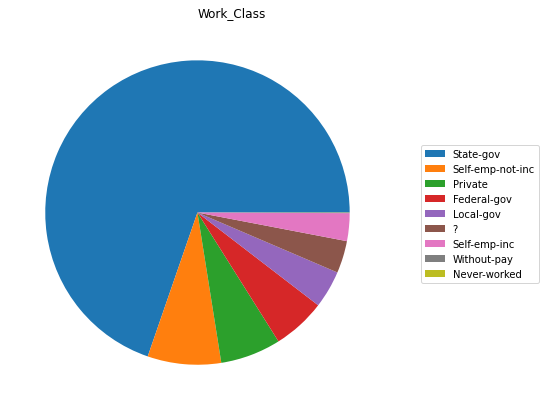

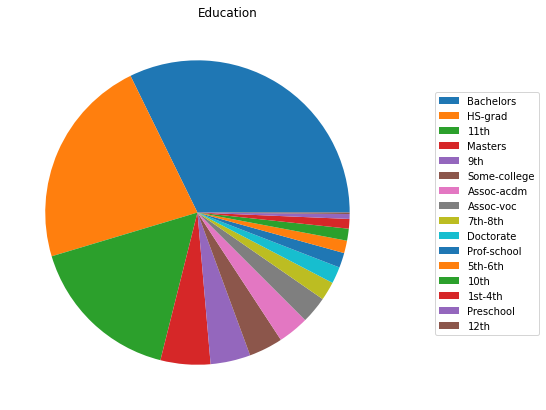

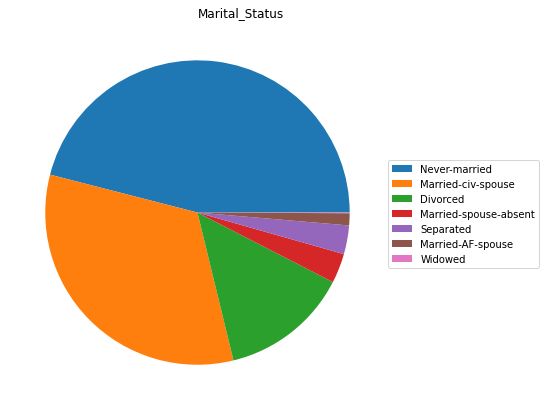

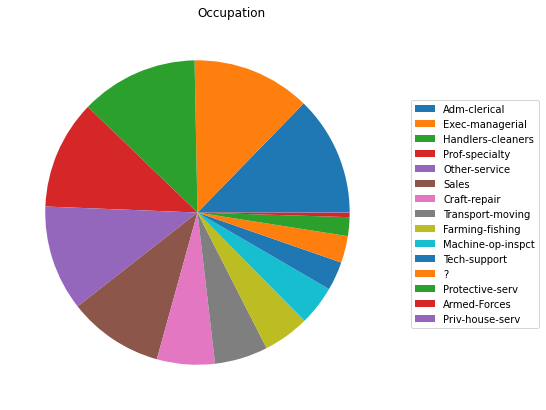

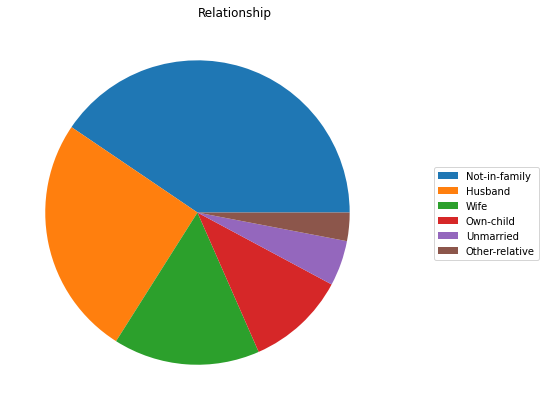

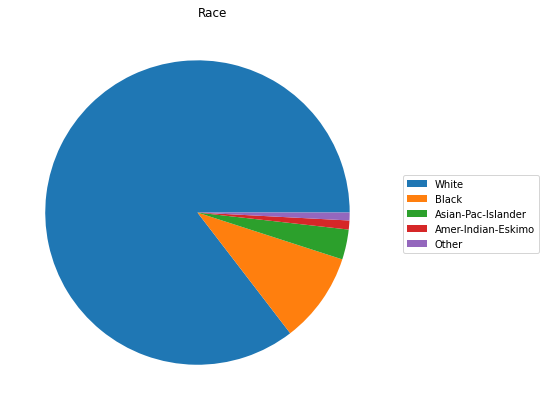

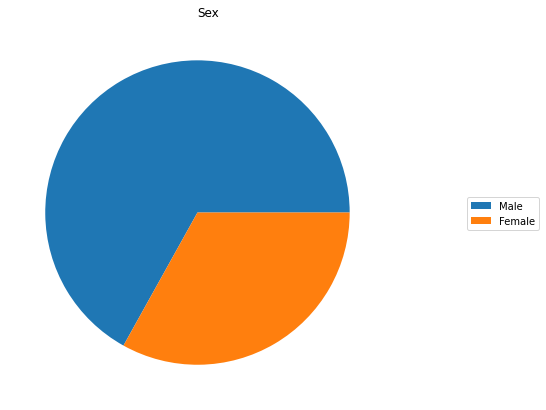

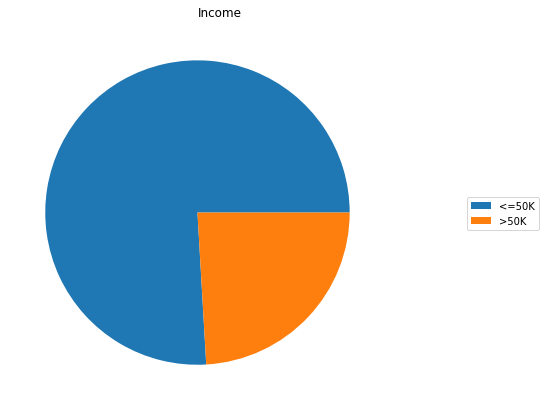

In [14]:
for i, col in enumerate(list(filter(lambda x: x != 'Native_Country', categorical_features))):
    plt.figure(figsize=(7, 7))
    plt.pie(train_ds[col].value_counts())
    title = plt.title(col)
    title.set_ha("left")
    plt.legend(train_ds[col].unique(), bbox_to_anchor=(1.2, 0.5), loc="center right", fontsize=10,
               bbox_transform=plt.gcf().transFigure)


<b>Note:</b> We ignore the pie plot for the feature <i> "Native_Country" </i> because it has too many categories.

#### Plotting the scatter plots

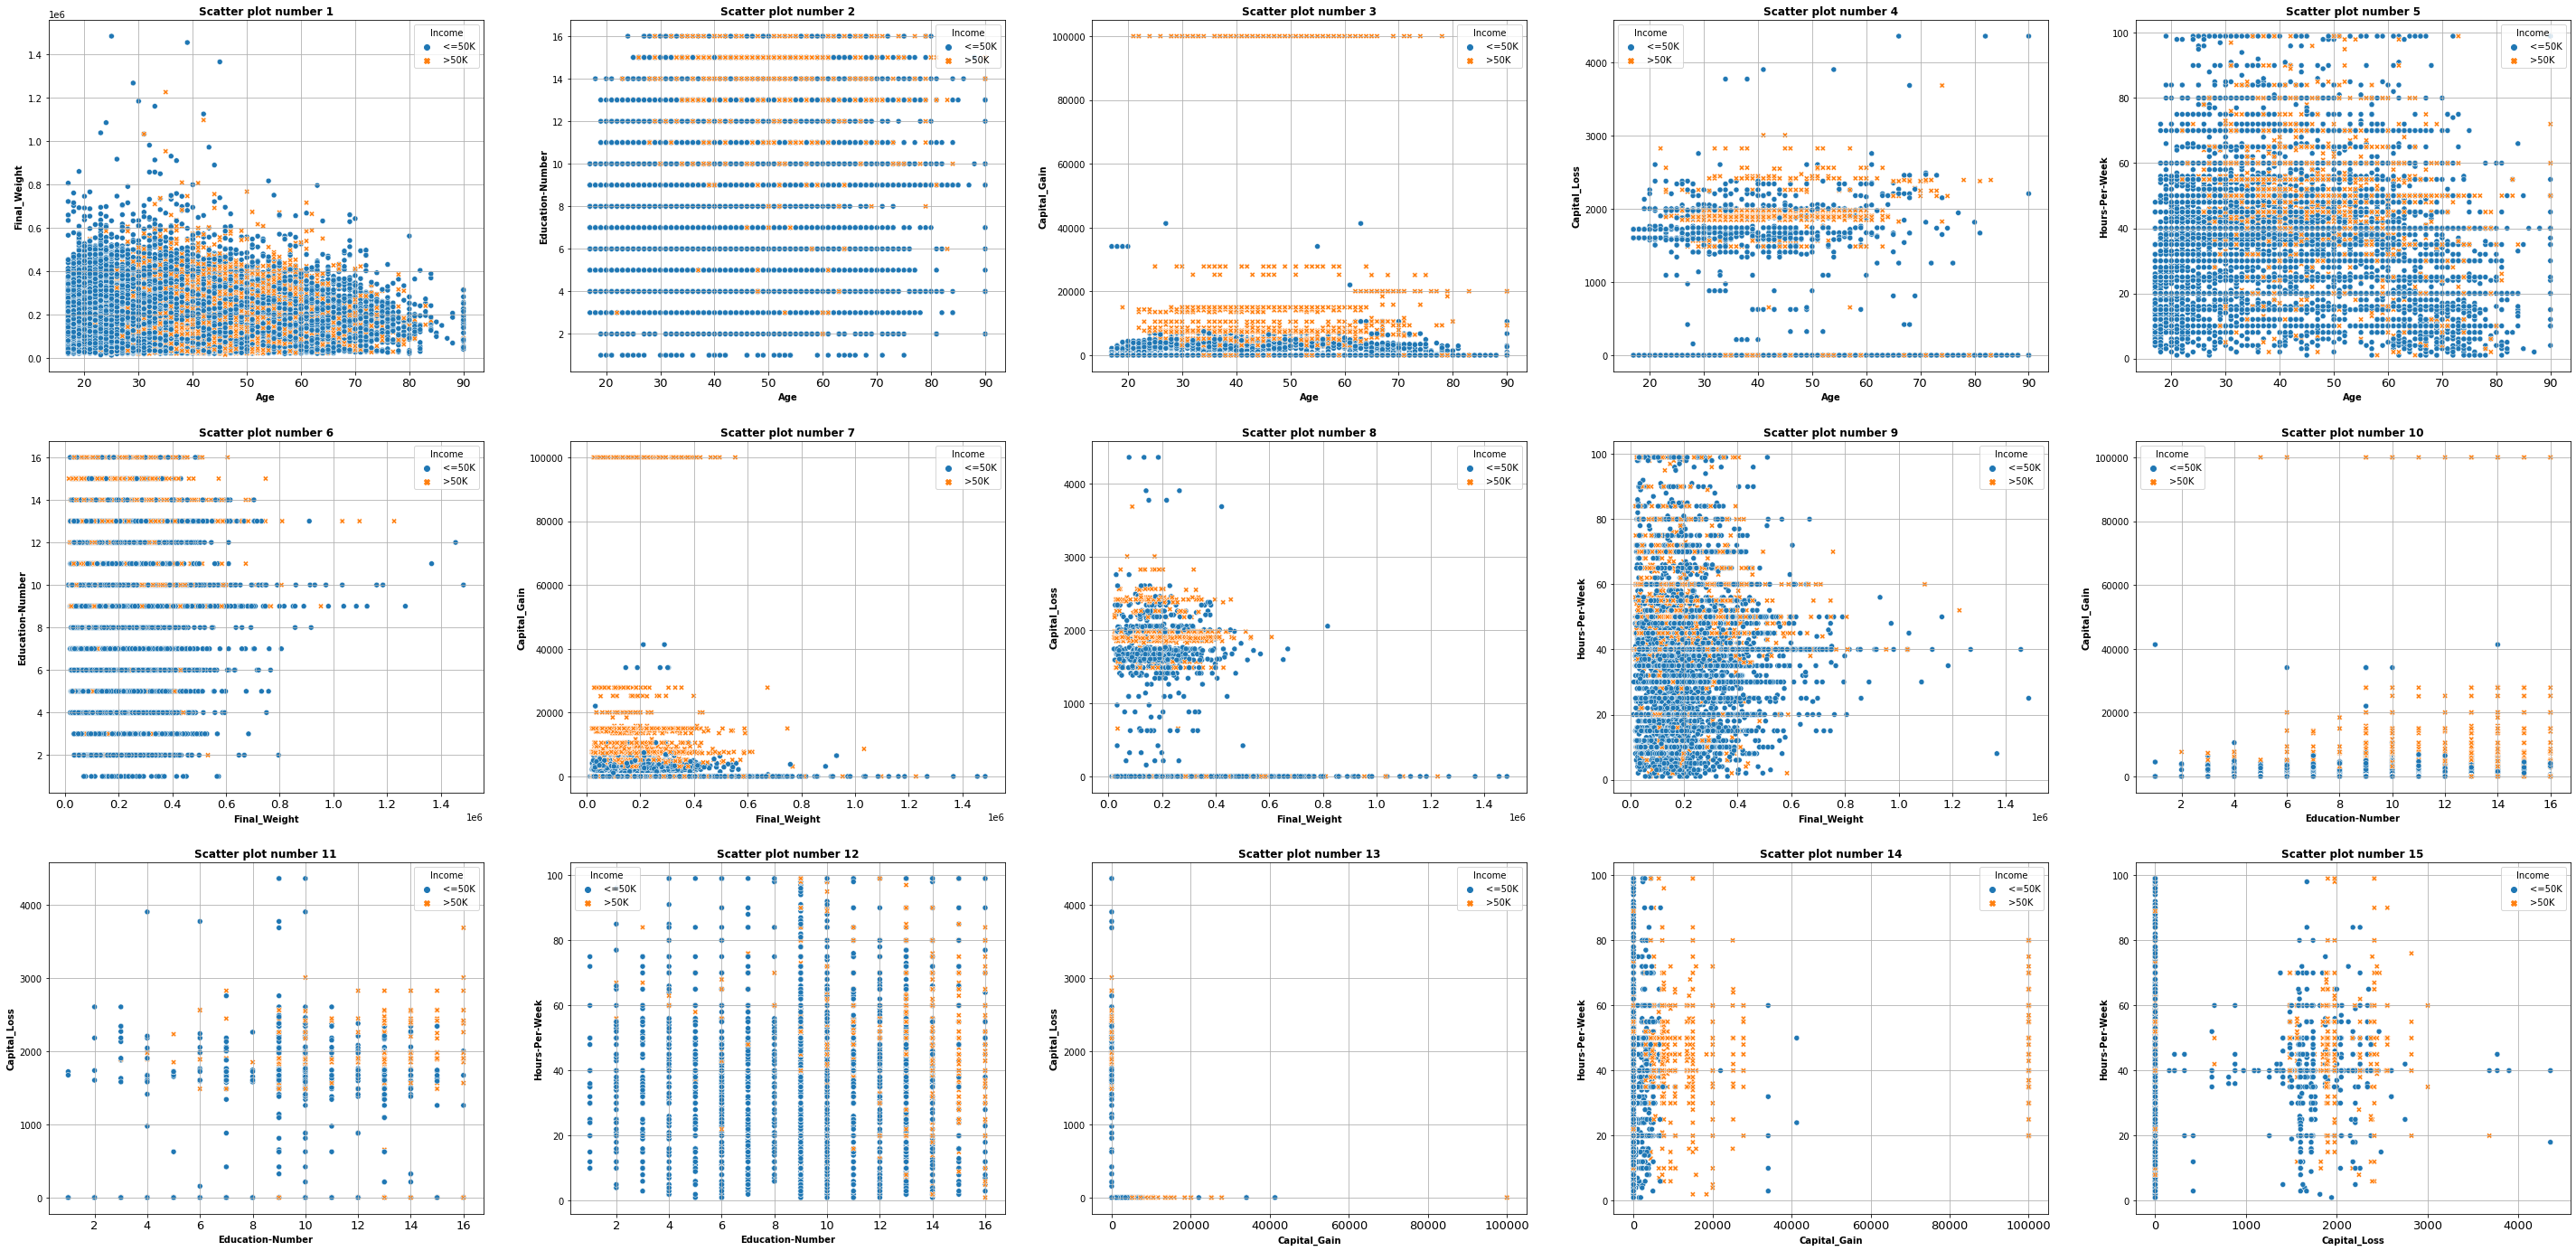

In [15]:
numerical_features = train_ds.select_dtypes(include='int64').columns

train_ds_label = train_ds['Income']
plt_num = 1
fig = plt.figure(figsize=(50, 50))
for i, x_col in enumerate(numerical_features):
    for j, y_col in enumerate(numerical_features[i:]):
        if x_col != y_col:
            plt.subplot(6, 5, plt_num)
            sns.scatterplot(data=train_ds, x=x_col, y=y_col, hue="Income",
                            style="Income")
            plt.xlabel(xlabel=x_col, fontweight="bold")
            plt.ylabel(ylabel=y_col, fontweight="bold")
            plt.title(f"Scatter plot number {plt_num}", fontweight="bold")
            plt.xticks(fontsize=13)
            plt.grid(True)
            plt_num = plt_num + 1


<b>Note:</b>
- there is no correlation between features.
- As we can see in the '**' scatter plot number 3 '**' the label of samples that their '__'capital_gain'__' is above 10000 is orange.
- As we can see in the '**' scatter plot number 12 '**' most of the label of samples that their '**' Education_Number '**' is more that 9 is orange.
- As we can see in the '**' scatter plot number 13 '**' most of the label of samples that their '**' Capital_Gain '**' is more that 4000 is orange.


#### Ploting the box plot for the numerical data

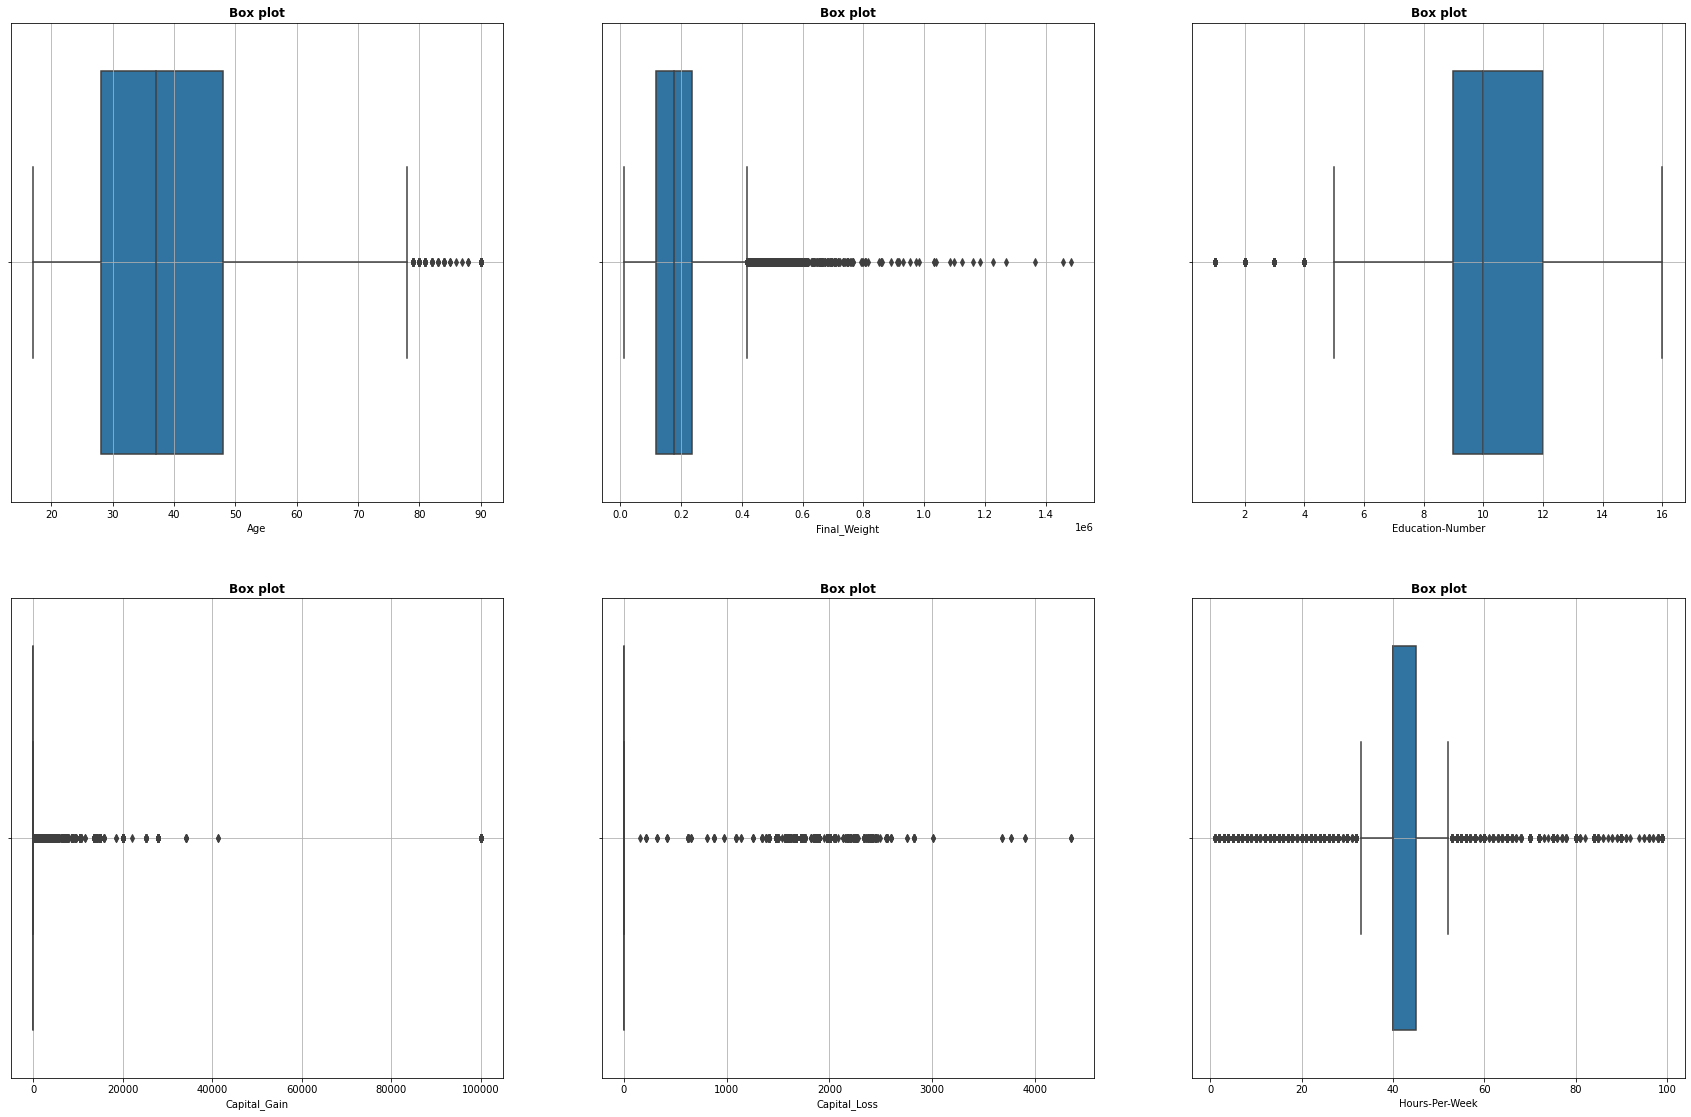

In [16]:
plt_num = 1
fig = plt.figure(2, figsize=(30, 30))
for x_col in numerical_features:
    plt.subplot(3, 3, plt_num)
    sns.boxplot(data=train_ds, x=x_col, hue="Income")
    plt.title("Box plot", fontweight="bold")
    plt.xticks(fontsize=10)
    plt.grid(True)
    plt_num = plt_num + 1

<b>Note:</b>
- We should decide how to deal with '**' Capital_Gain '**' and '**' Capital_Loss '**' because most of the samples are zero in these two features. (more than 75% of the samples are 0)


### correlation between features

#### correlation between numerical data

In [17]:
train_ds.corr()

,Age,Final_Weight,Education-Number,Capital_Gain,Capital_Loss,Hours-Per-Week
Age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756
Final_Weight,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768
Education-Number,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123
Capital_Gain,0.077674,0.000432,0.122630,1.000000,-0.031615,0.078409
Capital_Loss,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.054256
Hours-Per-Week,0.068756,-0.018768,0.148123,0.078409,0.054256,1.000000


<b>Note:</b>
- there are a little correation between ('**' Education-Number '**', '**' Hours-Per-Week '**')

#### correlation between categorical data

 <b>Note</b>:
- you should to install dython package 

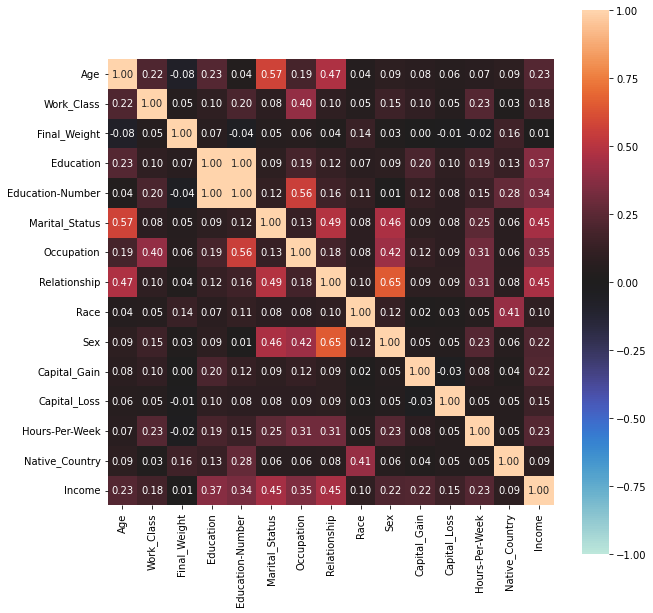

In [20]:
from dython.nominal import identify_nominal_columns, associations
complete_correlation= associations(train_ds, filename= 'complete_correlation.png', figsize=(10,10))